<a href="https://colab.research.google.com/github/Alex112525/Neural-networks-fundamentals/blob/main/Numpy_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

#Create a synthetic dataset

The make_gaussian_quantiles function generates a dataset of Gaussian blobs for classification.

* mean: the mean value of the Gaussian distribution, by default None, which means that the mean is computed from the data.
* cov: the covariance of the Gaussian distribution, a scalar value.
* n_samples: the number of samples to generate, represented by N.
* n_features: the number of features for each sample, it is set to 2 in this case.
* n_classes: the number of classes for classification, it is set to 2 in this case.
* shuffle: whether to shuffle the samples before returning them, it is set to True in this case.
* random_state: a random seed for generating the samples, it is set to None by default.


In [ ]:
N = 500
Gauss = make_gaussian_quantiles(mean = None,
                        cov = 0.3,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle=True,
                        random_state=None)

X, Y = Gauss
Y.shape

(500,)

The np.newaxis is used to add a new dimension to the existing array, in this case, converting a 1D array into a 2D array with one column. 
The shape of the resulting 2D array will be (number of rows in Y, 1).

In [ ]:
Y = Y[:, np.newaxis]
Y.shape

(500, 1)

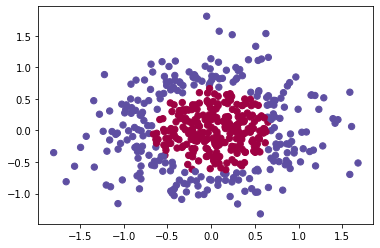

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s = 40, cmap=plt.cm.Spectral)

#Activation functions

The derivative of functions is used in neural networks for the optimization of the model parameters during training, allowing the model to learn from the data and make accurate predictions.

In [ ]:
def sigmoid(z, derivate=False):
  if derivate:
    return np.exp(-z) / ((np.exp(-z) + 1)**2)
  return 1 / (1 + np.exp(-z))

def ReLU(z, derivate=False):
  if derivate:
    return np.piecewise(z, [z<= 0, z>0], [0, 1])
  return np.piecewise(z, [z<=0, z>0], [0, lambda z:z])

#Loss function

The Mean Squared Error (MSE) is a common loss function used in regression problems. It measures the average squared difference between the predicted and true values. Mathematically, it is defined as the average of the squared differences between the predicted and true values for each sample in the dataset. The MSE is calculated as:

MSE = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$

In [ ]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  return np.mean((y_hat - y)**2)

#Initialize the Neural Net

The initialize_parameters function is used for initializing the parameters (weights and biases) of a neural network.

* layer_dim is a list that contains the dimensions of each layer in the network, including the input and output layers.

The function creates a dictionary called parameters to store the weights and biases of the network. The size of the network is determined by the length of layer_dim.

In [ ]:
def initialize_parameters(layer_dim):
  parameters = {}
  size = len(layer_dim)
  for l in range(size-1):
    parameters["W" + str(l+1)] = (np.random.rand(layer_dim[l], layer_dim[l+1]) * 2) - 1
    parameters["b" + str(l+1)] = (np.random.rand(1, layer_dim[l+1]) * 2) - 1
  return parameters

Neural network architecture

In [ ]:
layer_dims = [2,4,8,1]
layers = initialize_parameters(layer_dims)
layers

{'W1': array([[ 0.84617923, -0.50118068, -0.4364407 , -0.42804404],
        [ 0.30578737,  0.00482512,  0.10714142,  0.24436875]]),
 'b1': array([[-0.90486992, -0.98798555,  0.89829435,  0.58486953]]),
 'W2': array([[ 0.66894377,  0.01581467, -0.54714541,  0.82298141,  0.70937193,
          0.6406047 ,  0.02816526,  0.86227341],
        [ 0.00300549, -0.41212583, -0.33104597, -0.73221825,  0.42127934,
          0.79930607,  0.25126961,  0.8087073 ],
        [ 0.15367857, -0.37531033,  0.73302934, -0.76740806,  0.66360949,
         -0.53769922,  0.15981994,  0.86173238],
        [-0.39246248, -0.91241805, -0.56633623,  0.53338011,  0.22718261,
         -0.31985624, -0.45924379, -0.74803528]]),
 'b2': array([[ 0.89246758, -0.7896781 ,  0.10112785, -0.50951784,  0.99999383,
         -0.52862456, -0.94569928, -0.61957569]]),
 'W3': array([[ 0.37496048],
        [-0.32343219],
        [-0.57678661],
        [-0.40404718],
        [ 0.06930383],
        [ 0.31665411],
        [-0.40851408],


#Training function

This function is a training function for a simple three-layer neural network.

* The function performs the forward pass of the network.
* The function also performs backpropagation, which is the process of computing the gradients of the loss with respect to the weights and biases, if the training flag is set to True.
* The function then updates the weights and biases using gradient descent, where the gradients are multiplied by the learning rate and then subtracted from the weights and biases.

In [ ]:
def train(X_data, lr, params, training=True):
    ## Forward
    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = ReLU(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = ReLU(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y, output, True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * ReLU(params['A2'], True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * ReLU(params['A1'], True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True)) * lr
    
    return output

In [ ]:
X.shape

(500, 2)

#Training Neural Network 

In [ ]:
layer_dims = [2,4,8,1]

NN = initialize_parameters(layer_dims)
errors = []
lr = 0.0001

for _ in range(50000):
  out = train(X, lr, NN)
  if _%1000 == 0:
    loss = mse(Y, out)
    print(loss)
    errors.append(loss)

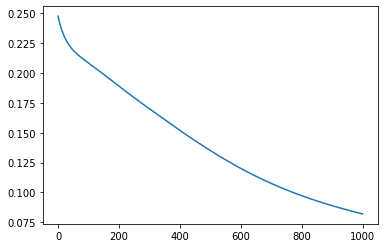

In [ ]:
plt.plot(errors)

#Testing

Generate a random test data of shape (500, 2) with values ranging from -1 to 1.

In [ ]:
test_data = (np.random.rand(500,2) * 2)-1
y = train(test_data, 0, NN, False)

In [ ]:
y = np.where(y>=0.5, 1, 0)

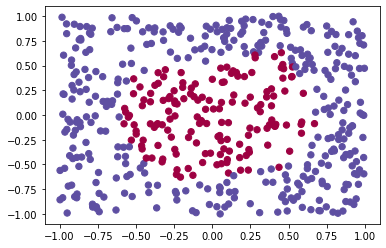

In [ ]:
plt.scatter(test_data[:,0], test_data[:,1], c=y[:,0], s = 40, cmap=plt.cm.Spectral)